In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
data=pd.read_csv('provinces.csv', encoding='latin1')
data.head()

,province,year,population,region
0,Adana,2007,2006650,Mediterranean Region
1,Adana,2008,2026319,Mediterranean Region
2,Adana,2009,2062226,Mediterranean Region
3,Adana,2010,2085225,Mediterranean Region
4,Adana,2011,2108805,Mediterranean Region


In [3]:
#selecting year 2018
current_year = 2018
year_2018 = data['year'] == current_year
sorting_2018 = data[year_2018]
#in descending order
sorted_descending_2018 = sorting_2018.sort_values(by='population', ascending=False).head(20)
sorted_descending_2018

,province,year,population,region
479,Istanbul,2018,15067724,Marmara Region
83,Ankara,2018,5503985,Central Anatolia Region
491,Izmir,2018,4320519,Aegean Region
251,Bursa,2018,2994521,Marmara Region
95,Antalya,2018,2426356,Mediterranean Region
11,Adana,2018,2220125,Mediterranean Region
635,Konya,2018,2205609,Central Anatolia Region
815,Sanliurfa,2018,2035809,Southeast Anatolia Region
395,Gaziantep,2018,2028563,Southeast Anatolia Region
623,Kocaeli,2018,1906391,Marmara Region


<Figure size 1500x800 with 0 Axes>

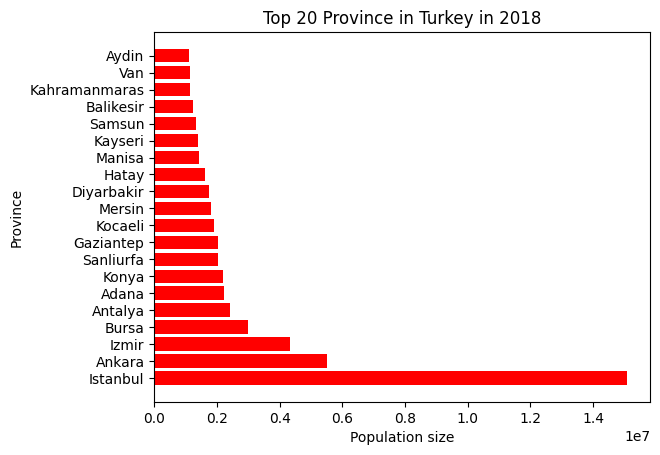

In [4]:
plt.figure(figsize=(15,8))
ax = plt.subplots()
plt.barh(sorted_descending_2018['province'], sorted_descending_2018['population'], color='red')
plt.title('Top 20 Province in Turkey in 2018')
plt.xlabel('Population size')
plt.ylabel('Province')
colors = dict(zip(
             ['Marmara Region','Aegean Region','Mediterranean Region','Central Anatolia Region','Black Sea Region','Eastern Anatolia Region','Southeast Anatolia Region'],
             ['#FFC300', '#FF5733', '#C70039', '#900C3F', '#581845', '#1A5276', '#4CAF50']
))
group_1k = data.set_index('province')['region'].to_dict()

Text(1, 0.4, '2018')

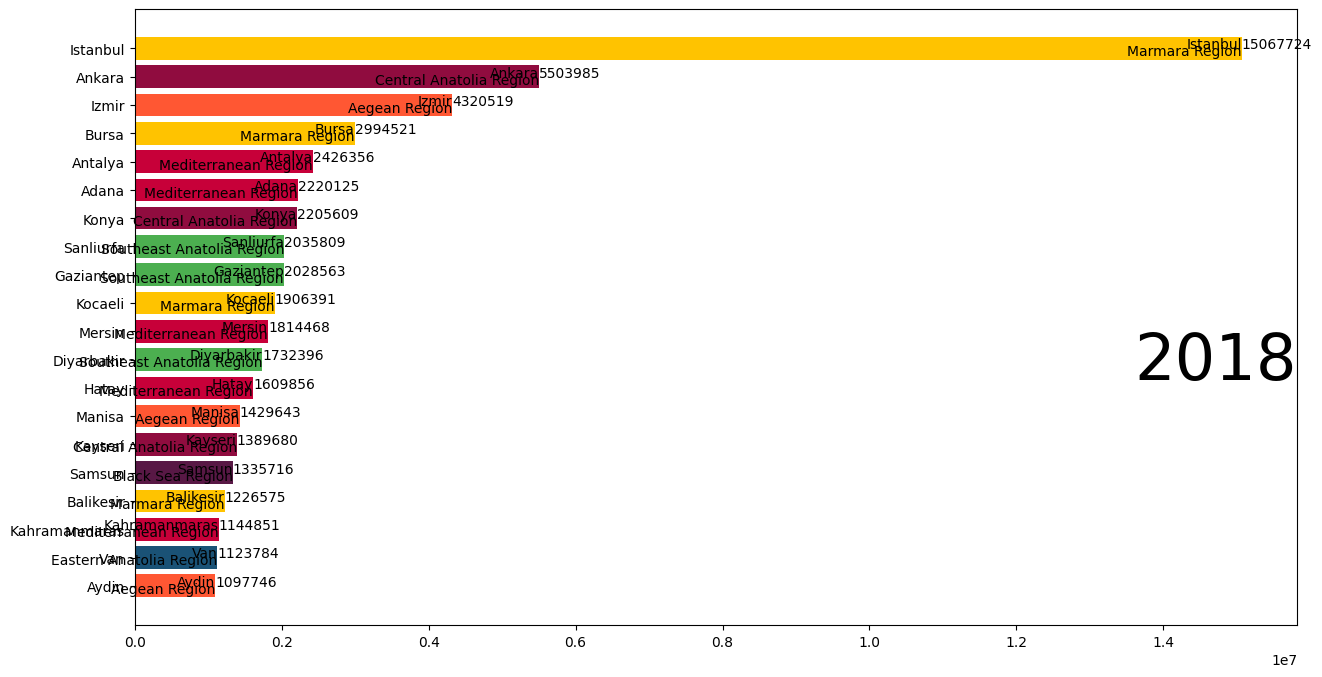

In [5]:
plt.figure(figsize=(15,8))
ax = plt.subplot()
#flip from top to bottom
top_sorted_descending_2018 = sorted_descending_2018[::-1]
plt.barh(top_sorted_descending_2018['province'], top_sorted_descending_2018['population'], color=[colors[group_1k[x]] for x in top_sorted_descending_2018['province']])
#showing province, region and values via iteration
for i, (value, name) in enumerate (zip(top_sorted_descending_2018['population'], top_sorted_descending_2018['province'])):
    plt.text(value, i, name, ha='right')
    plt.text(value, i-.25, group_1k[name], ha='right')
    plt.text(value, i, value, ha='left')

# adjust y-tick labels
plt.yticks(np.arange(len(top_sorted_descending_2018)), [name[:20] + '...' if len(name) > 20 else name for name in top_sorted_descending_2018['province']])

# adding year
plt.text(1, 0.4, current_year, transform = plt.gca().transAxes, size=46, ha='right')

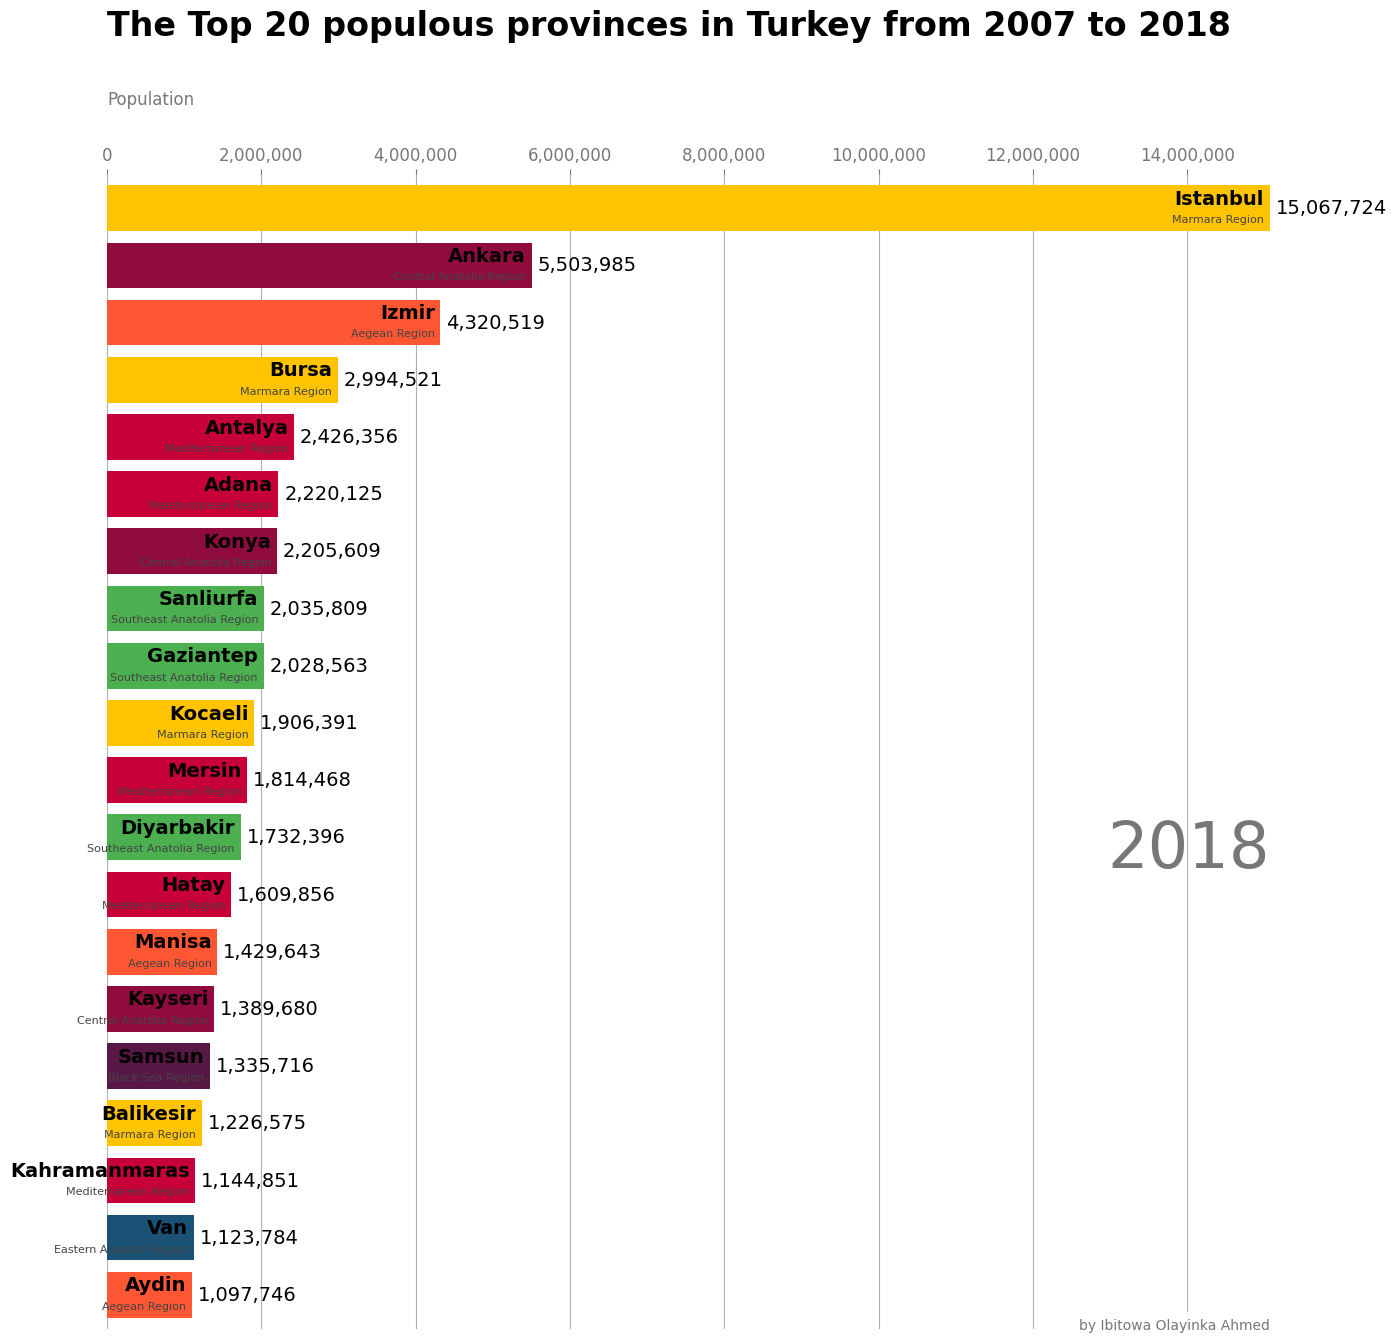

In [8]:
plt.figure(figsize=(15, 15))
ax = plt.subplot()

def draw_barchart(year):
    top_sorted_descending_2018 = data[data['year'].eq(year)].sort_values(by='population', ascending =True).tail(20)
    ax.clear()
    plt.barh(top_sorted_descending_2018['province'], top_sorted_descending_2018['population'], color=[colors[group_1k[x]] for x in top_sorted_descending_2018['province']])
    dx = top_sorted_descending_2018['population'].max() / 200
    for i, (value, name) in enumerate(zip(top_sorted_descending_2018['population'], top_sorted_descending_2018['province'])):
        ax.text(value-dx, i, name, size=14, weight=800, ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_1k[name], size=8, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i, f'{value:,.0f}', size= 14, ha='left', va='center')
    # ... polished styles
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=500)
    ax.text(0, 1.06, 'Population', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'The Top 20 populous provinces in Turkey from 2007 to 2018',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by Ibitowa Olayinka Ahmed', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart(2018)

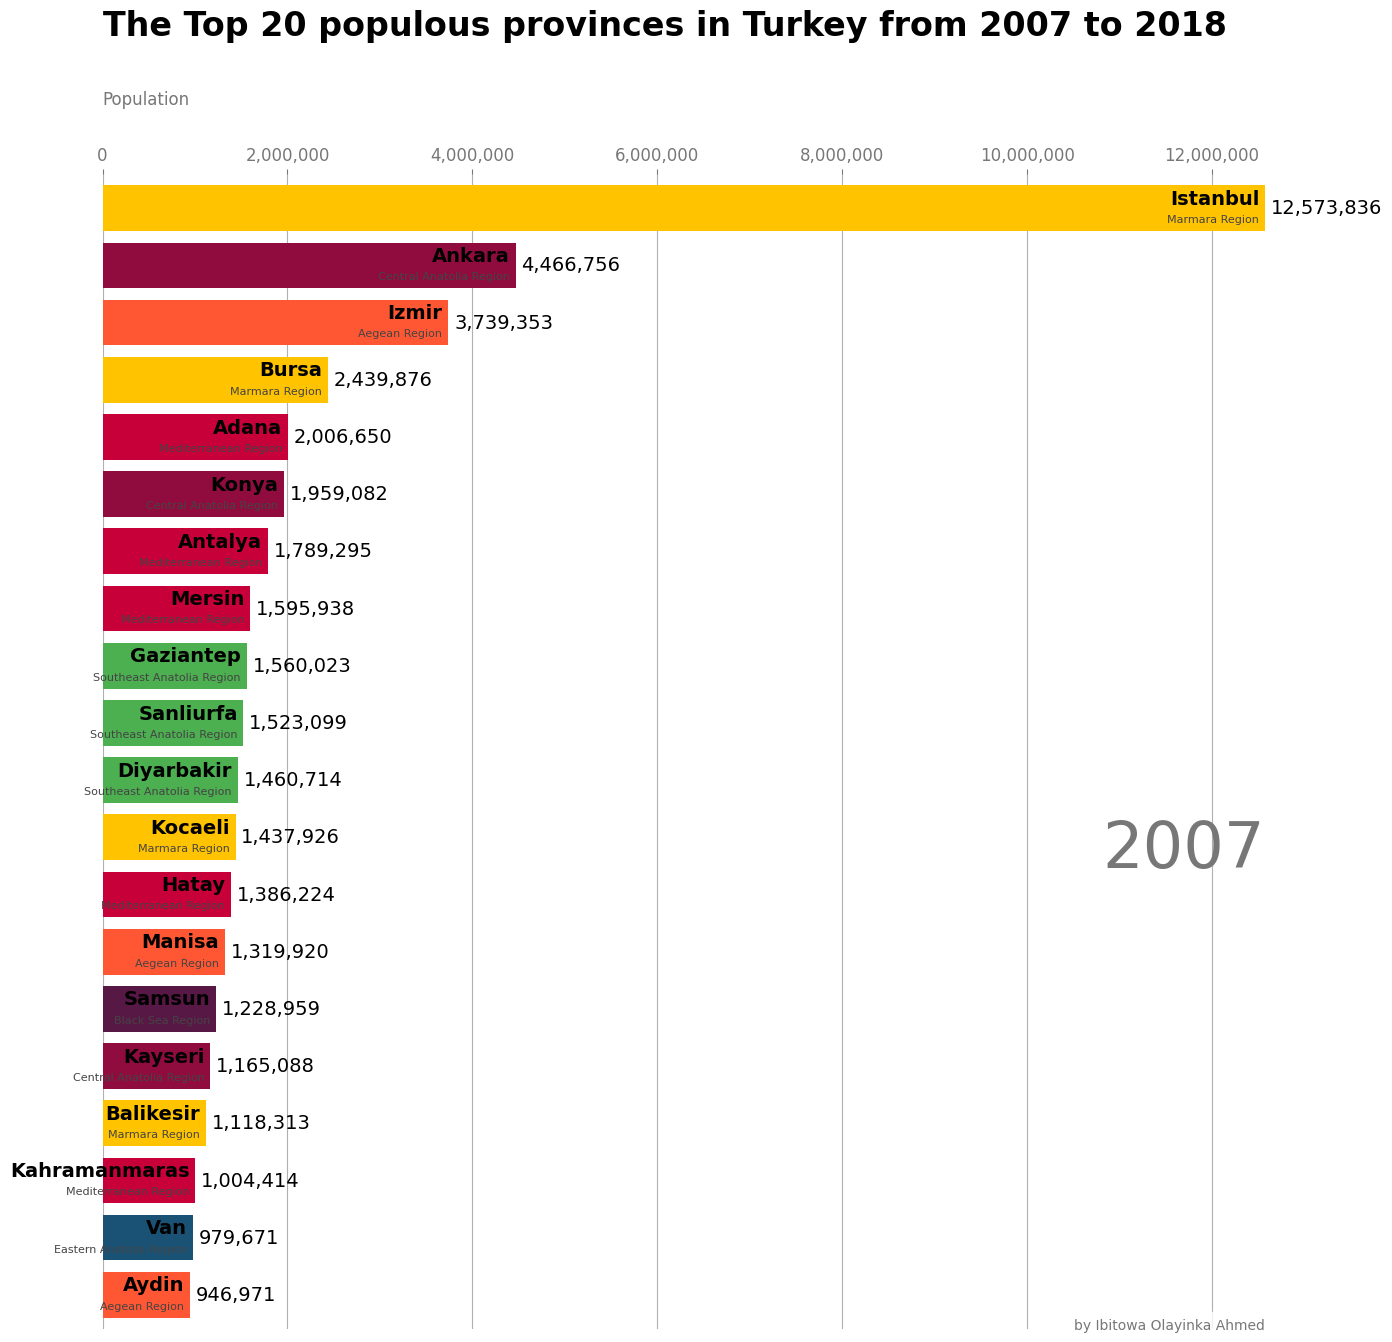

In [10]:
import matplotlib.animation as animation
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(15, 15))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(2007, 2018))
HTML(animator.to_jshtml())